# Assignment 6 - Inferential Statistics
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Duncan Ferguson

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import sem
from statsmodels.stats.weightstats import ztest as ztest

These questions will refer to a dataset on 801 Pokémon, taken from [this Kaggle link](https://www.kaggle.com/rounakbanik/pokemon). If you're not familiar with Pokémon, don't worry. You don't need any outside knowledge to do this assignment. If you are a Pokémon veteran, then you may know that there are actually more Pokémon than what are in this dataset, so this dataset is not complete. (You might say they have not caught them all.) Nonetheless, we will assume this dataset represents the entire population in question.

Normally we do not have access to the entire population being researched. This example is therefore unrealistic, even excluding the fact that we're talking about fictional monsters from a video game / anime series. Nonetheless, this demonstrates the ideas discussed in class and is hopefully fun for you.

# Question 1 - Exploratory Analysis

## Part (a)
### 2 points: Done

Download the `pokemon.csv` file from the Canvas assignment page and read it into a Pandas data frame. There are many columns that we can ignore; just keep the columns `'name'`, `'base_total'`, `'type1'`, `'type2'`, `'weight_kg'`, and `'generation'`. Print the head of your filtered data frame to confirm that you only have these columns. Also print the shape of the data frame to confirm that the dataset contains 801 rows.

In [6]:
df = pd.read_csv('pokemon.csv')
df = df[['name', 'base_total', 'type1', 'type2','weight_kg','generation']].copy()
df.head()

,name,base_total,type1,type2,weight_kg,generation
0,Bulbasaur,318,grass,poison,6.9,1
1,Ivysaur,405,grass,poison,13.0,1
2,Venusaur,625,grass,poison,100.0,1
3,Charmander,309,fire,NaN,8.5,1
4,Charmeleon,405,fire,NaN,19.0,1


In [7]:
df.shape

(801, 6)

## Part (b)
### 2 points

All Pokémon have either 1 or 2 types, called "primary" (corresponding to `'type1'`) and "secondary" (`'type2'`) respectively. As of the most recent games, there are 18 types total. Confirm this value using the column `'type1'`.

Then, count how many Pokémon there of each type. This can be easily computed using the `value_counts` method and by knowing that it is not possible for one Pokémon to have the same type for both `type1` and `type2`. Plot a bar plot showing a count for each type with each type listed along the x-axis.

In [8]:
df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [9]:
# Confirming that there are 18 different types of variables for df['type1'].unique()
len(df['type1'].unique())

18

In [10]:
# Displaying Type 1 Value Counts
df.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

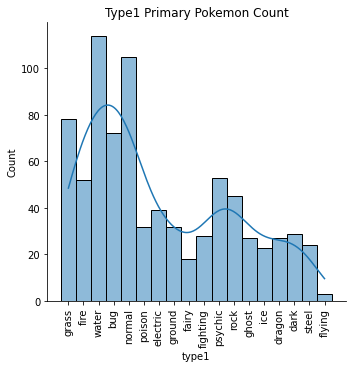

In [11]:
# Graphing Type 1 value counts
plot = sns.displot(data=df.type1, kde=True)
plot.set_xticklabels(rotation=90);
plot.tight_layout()
plt.title("Type1 Primary Pokemon Count");

In [12]:
# Displaying Type 2 Counts
df.type2.value_counts()

flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

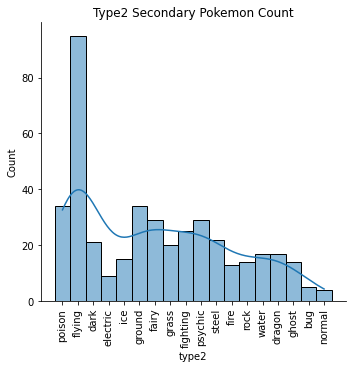

In [13]:
# Graphing Type 2 Counts
plot = sns.displot(data=df.type2, kde=True)
plot.set_xticklabels(rotation=90);
plot.tight_layout()
plt.title("Type2 Secondary Pokemon Count");

In [14]:
# Manipulating the data so that I can count types for both type 1 & 2 together
df_type1 = df[['name', 'type1']].copy()
df_type2 = df[['name', 'type2']].copy()
df_type2 = df_type2[~df_type2['type2'].isnull()].copy()
df_type1['Type_Origin'] = ['Type1' for _ in range(len(df_type1['type1']))]
df_type2['Type_Origin'] = ['Type2' for _ in range(len(df_type2['type2']))]
df_type1.rename(columns={'type1':'type'}, inplace=True)
df_type2.rename(columns={'type2':'type'}, inplace=True)
df_comp = pd.concat([df_type1, df_type2], ignore_index=True)
# Displaying the Counts for the comp
df_comp['type'].value_counts()

water       131
normal      109
grass        98
flying       98
psychic      82
bug          77
poison       66
ground       66
fire         65
rock         59
fighting     53
dark         50
electric     48
fairy        47
steel        46
dragon       44
ghost        41
ice          38
Name: type, dtype: int64

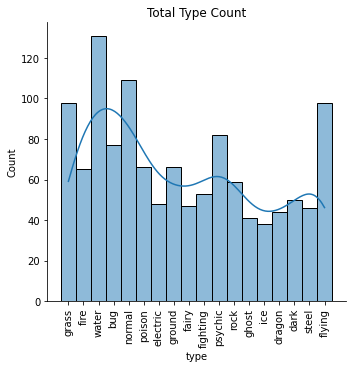

In [15]:
# Graphing the comp counts
plot = sns.displot(data=df_comp.type, kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Total Type Count");

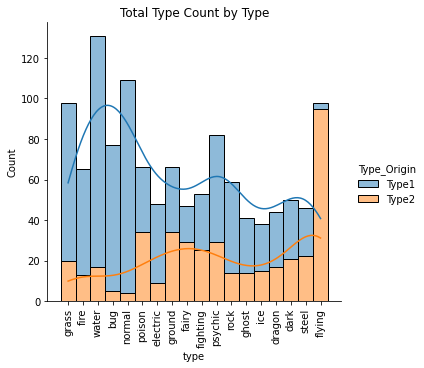

In [16]:
plot = sns.displot(data=df_comp, x='type', hue='Type_Origin', multiple='stack',kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Total Type Count by Type");

## Part (c)
### 4 points

`'weight_kg'` (unsurprisingly) is the weight in kilograms of a given Pokémon. `'base_total'` is the "base stat total" of a Pokémon, which is the sum of its HP, attack, speed, etc. Simply put, the base total is a measure of a Pokémon's overall strength.

Plot separate distribution plots for the columns `'weight_kg'` and `'base_total'`, overlaying the estimated distribution (kde) on each histogram. Print the skew value for each column along with its plot.

Are these distributions normal? Include your answers as an in-line comment within your code cell(s).

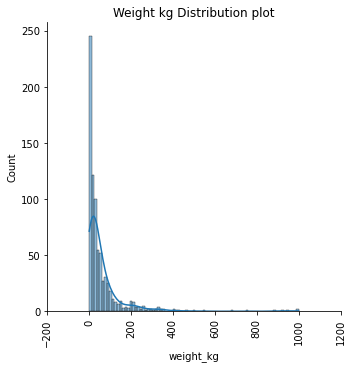

In [18]:
# Plotting distribution plot for 'weight_kg
plot = sns.displot(data=df.weight_kg, kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Weight kg Distribution plot");

In [19]:
print(f"Weight Kg skew: {df.weight_kg.skew()}")

Weight Kg skew: 4.8710444546306055


### Weight KG is not a normal distribution. It is skewed. The skewed value is above 1 indicated that the data is highly skewed. The Weight kg skew is to the right.

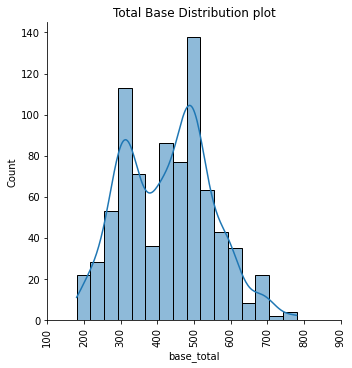

In [20]:
# Plotting distribution plot for base_total
plot = sns.displot(data=df.base_total, kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Total Base Distribution plot");

In [21]:
print(f"Total base skew: {df.base_total.skew()}")

Total base skew: 0.1745927583435159


### Total base has a skew value that is inbetween -0.5 and 0.5 indicating that the distrbution is appoximately symmetric. Meaning that it is closer to a normal distribution

# Question 2 - z-test

This question will use the `'base_total'` column as the data of interest and the Pokémon from Generation I as the sample set. While z-tests can easily be automated, here we will walk through the process to get a better feel for what's happening "behind the scenes".

## Part (a)
### 2 points

Suppose your friend likes Pokémon but is only familiar with the original 151 from generation 1. They didn't realize that many more games have come out since the first ones and are curious if the overall base totals have changed much with the newer generations. The Pokémon from generation 1 will be our sample.

For this example, we know the population mean and standard deviation. In realistic settings, these are given from outside sources, but in our case we can calculate them from the dataset of all Pokémon. Compute and print these values.

After determining the population mean (and standard deviation), state the null and alternative hypotheses in a text cell or as an in-line comment.

In [26]:
# Computing the Mean and stardard deviation for all Pokemon. i.e. All generations as asked for above.
df['base_total'].describe()

count    801.000000
mean     428.377029
std      119.203577
min      180.000000
25%      320.000000
50%      435.000000
75%      505.000000
max      780.000000
Name: base_total, dtype: float64

### The Null hypothesis is that the mean for Generation 1 is the same as the rest of the generations
Null Hypothesis $$ \mu =\mu_0 = 428.377029$$

### The Alternative hypothesis is that there is no evidence that suggests that the two means are the same
Alternative Hypothesis $$ \mu \neq \mu_0 \neq 428.377029$$




## Part (b)
### 2 points

As a separate data frame, extract the Pokémon that are from generation 1 to use as our sample. Call this variable `gen1`. Confirm that the last Pokémon included in the sample is the 151st (index 150) by printing the tail of `gen1`.

Calculate and print the standard error of the sampling distribution of the mean following the formula given in class:
$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
$$


In [35]:
# Extracting Pokemon from generation 1
gen1 = df[df['generation'] == 1].copy()

# Confirming that the last pokemon included in the sample is the 151st (Index 150) by printing the tail of gen1
gen1['base_total'].tail()

146    300
147    420
148    600
149    780
150    600
Name: base_total, dtype: int64

In [38]:
# Calculating the standard error the sampling distribution of the mean using two different versions. the later being the formula in class
sem(gen1['base_total'])

9.13667726225073

In [39]:
np.std(gen1['base_total'], ddof=1) / np.sqrt(np.size(gen1['base_total']))

9.136677262250727




## Part (c)
### 3 points

To demonstrate the properties of the z-distribution, create a Series that is the `'base_total'` column converted into z-scores using the formula:
$$
z = \frac{x-\mu}{\sigma}
$$
for each value $x$ in the column. Plot this distribution to visually confirm the mean is around 0 and the standard deviation is around 1.

Compute and output the "observed z", which is the sample mean converted into a z-score.
$$
z_{observed} = \frac{\bar{X} - \mu}{\sigma_{\bar{X}}}
$$

In [47]:
# Generating the Z scores for the whole df
df['base_total_z'] = (df['base_total'] - df['base_total'].mean())/df['base_total'].std(ddof=0)
df.head()

,name,base_total,type1,type2,weight_kg,generation,base_total_z
0,Bulbasaur,318,grass,poison,6.9,1,-0.926533
1,Ivysaur,405,grass,poison,13.0,1,-0.196233
2,Venusaur,625,grass,poison,100.0,1,1.650503
3,Charmander,309,fire,NaN,8.5,1,-1.002081
4,Charmeleon,405,fire,NaN,19.0,1,-0.196233


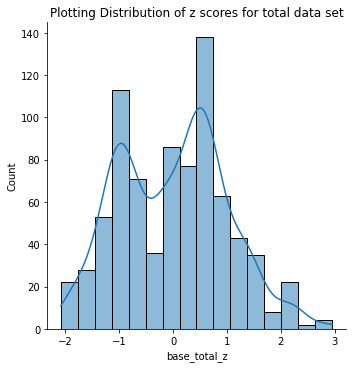

In [49]:
# Displaying the Z- Scores for the whole DF
sns.displot(df, x= "base_total_z", kde= True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Plotting Distribution of z scores for total data set");

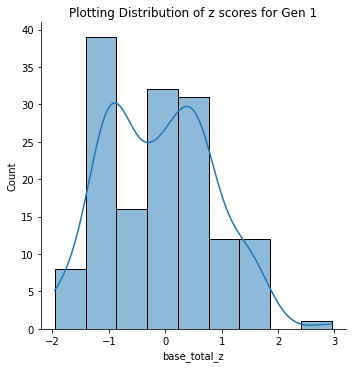

In [52]:
# Plotting the distribution for just generation 1
sns.displot(df[df['generation'] == 1], x= "base_total_z", kde= True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Plotting Distribution of z scores for Gen 1");

In [55]:
observed_z = (gen1['base_total'].mean()- df['base_total'].mean())/(np.std(gen1['base_total'], ddof=1) / np.sqrt(np.size(gen1['base_total'])))
observed_z

-1.3271097070557305

## Part (d)
### 2 points

Using a confidence level of $\alpha=0.05$ and corresponding critical values of $\pm1.96$, determine if the null hypothesis should be rejected or retained. State a conclusion regarding base totals of all Pokémon based on this decision rule.

Our observed z score is -1.3271 which is less than the critical value of  $\pm1.96$ So we fail to reject the null hypothesis with a level of significance of $\alpha=0.05$

## TODO DOUBLE CHECK THIS

# Question 3 - t-test

Base totals again are the data of interest, but now with two independent samples of mostly male Pokémon from generation 1 and mostly female Pokémon from generation 1.

## Part (a)
### 3 points

As an example of a two-sample t-test, let's suppose we are interested in seeing if there is any bias coming from the designers of the games regarding the base totals for Pokémon that are more likely to be male and those that are more likely to be female (the intuition being that the base totals for mostly female Pokémon are perhaps lower than those of mostly males). The two-sample t-test will determine if the mean base totals between these two groups significantly differ.

Start by extracting the Pokémon from `gen1` whose `'percentage_male'` is strictly greater than 50 in a separate data frame. Do the same for mostly female Pokémon whose `'percentage_male'` is strictly less than 50. *Note that we are excluding Pokémon whose `'percentage_male'` is equal to 50.*

Confirm the normality of these two group's `'base_total'` values using distribution plots and skewness value as before.

In [102]:
df2 = pd.read_csv('pokemon.csv')
df2 = df2[['name', 'base_total', 'type1', 'type2','weight_kg','generation', 'percentage_male']].copy()
df2 = df2[~df2['percentage_male'].isnull()].copy()


gen1_v2 = df2[df['generation'] == 1].copy()
gen1_male = gen1_v2[gen1_v2['percentage_male'] > 50]
gen1_female = gen1_v2[gen1_v2['percentage_male'] < 50]

C:\Users\dunca\AppData\Local\Temp/ipykernel_19596/4155852391.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gen1_v2 = df2[df['generation'] == 1].copy()


In [103]:
gen1_male.head()

,name,base_total,type1,type2,weight_kg,generation,percentage_male
0,Bulbasaur,318,grass,poison,6.9,1,88.1
1,Ivysaur,405,grass,poison,13.0,1,88.1
2,Venusaur,625,grass,poison,100.0,1,88.1
3,Charmander,309,fire,NaN,8.5,1,88.1
4,Charmeleon,405,fire,NaN,19.0,1,88.1


In [104]:
gen1_female.head()

,name,base_total,type1,type2,weight_kg,generation,percentage_male
28,Nidoran♀,275,poison,NaN,7.0,1,0.0
29,Nidorina,365,poison,NaN,20.0,1,0.0
30,Nidoqueen,505,poison,ground,60.0,1,0.0
34,Clefairy,323,fairy,NaN,7.5,1,24.6
35,Clefable,483,fairy,NaN,40.0,1,24.6


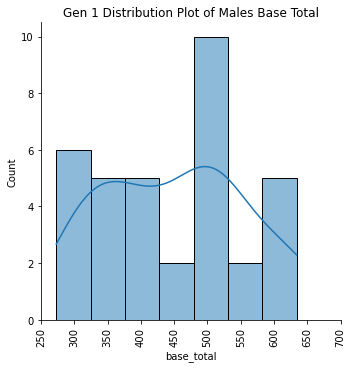

In [105]:
# Plotting distribution plot for 'weight_kg
plot = sns.displot(data=gen1_male.base_total, kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Gen 1 Distribution Plot of Males Base Total");

In [106]:
print(f"Total base skew: {gen1_male.base_total.skew()}")

Total base skew: 0.1073057362993733


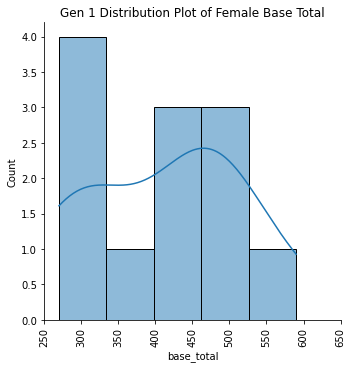

In [107]:
# Plotting distribution plot for 'weight_kg
plot = sns.displot(data=gen1_female.base_total, kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Gen 1 Distribution Plot of Female Base Total");

In [108]:
print(f"Total base skew: {gen1_female.base_total.skew()}")

Total base skew: -0.02523749124096716


C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


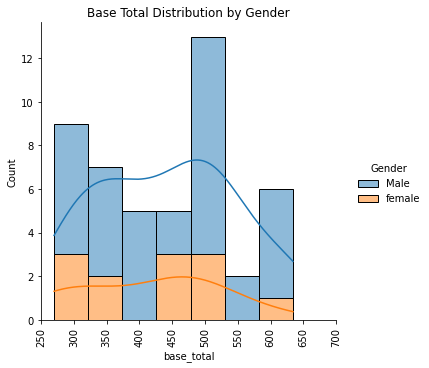

In [109]:
gen1_male['Gender'] = ['Male' for _ in range(len(gen1_male['base_total']))]
gen1_male_bt = gen1_male[['base_total', 'Gender']].copy()

gen1_female['Gender'] = ['female' for _ in range(len(gen1_female['base_total']))]
gen1_female_bt = gen1_female[['base_total', 'Gender']].copy()

gen1_gender = pd.concat([gen1_male_bt, gen1_female_bt], ignore_index=True)
# Displaying the Counts for the comp
plot = sns.displot(data=gen1_gender, x='base_total', hue='Gender', multiple='stack',kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Base Total Distribution by Gender");

## Part (b)
### 2 points

Generally the t-test requires an assumption that the variance between the two independent groups is roughly equal (called "homogeneity of variance"). The t-test method given by `stats` can actually account for when the variance is unequal as well. Regardless, we need to know which is the case for our data, so let's check using the Levene test. Again, we're interested in the `'base_total'` values of each group - mostly male and mostly female.

In [111]:
test_stat, p_value = stats.levene(gen1_male.base_total, gen1_female.base_total)
alpha = 0.05

if p_value > alpha:
  print("Retain H0 - variance is roughly equal")
else:
  print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")


Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.7408294278242322
test stat: 0.1107570254698387


In [84]:
gen1_female.base_total.mean()

412.9166666666667

In [85]:
gen1_male.base_total.mean()

450.22857142857146

## Part (c)
### 3 points

Now that we know what to set the `equal_var` parameter to (either `True` or `False`), perform the t-test for two independent samples. Use the resulting p-value and an alpha of 0.05 to determine if the null hypothesis can be rejected or not. State your conclusion either as an in-line comment with your t-test code or as a separate text cell.

In [112]:
test_stat, p_value = stats.ttest_ind(gen1_male.base_total, gen1_female.base_total, equal_var=True)
alpha = 0.05

if p_value > alpha:
  print("Retain H0 - variance is roughly equal")
else:
  print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")

Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.2989084640467425
test stat: 1.050915461492849


# Question 4 - ANOVA

Again we use base totals, but with three independent subsets of the population: Pokémon from generations 1, 2, and 3.

## Part (a)
### 3 points

Suppose another friend of yours was super into Pokémon for a while, playing the first three generations of the games for hours on end when they were a kid. They are curious if the base totals of Pokémon between generations stays relatively the same, or if there are perhaps generations that are "overpowered". To test this, we can use ANOVA.

Start by extracting the Pokémon from generations 2 and 3 into variables called `gen2` and `gen3`, just as we did earlier with `gen1`.

Plot all three generations on the same distribution plot using their generation value to adjust the color of the plot. This can be easily achieved by creating a combined data frame with all three generations appended one after the other (`gen1` appended with `gen2` appended with `gen3`). You can then use Seaborn's `displot` method to plot histograms of all three generations with `hue` set accordingly. Set the `multiple` parameter to `'dodge'` to make each bar sit side-by-side with the others.

In [118]:
df4 = pd.read_csv('pokemon.csv')
df4 = df4[['base_total','generation']].copy()
df4 = df4[df['generation'] < 4].copy()
gen1  = df4[df4['generation'] == 1].copy()
gen2  = df4[df4['generation'] == 2].copy()
gen3  = df4[df4['generation'] == 3].copy()

In [119]:
gen1.head()

,base_total,generation
0,318,1
1,405,1
2,625,1
3,309,1
4,405,1


In [120]:
gen2.head()

,base_total,generation
151,318,2
152,405,2
153,525,2
154,309,2
155,405,2


In [121]:
gen3.head()

,base_total,generation
251,310,3
252,405,3
253,630,3
254,310,3
255,405,3


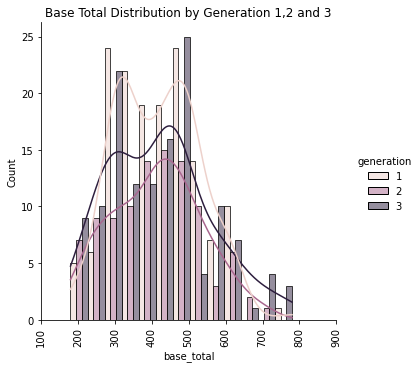

In [124]:
plot = sns.displot(data=df4, x='base_total', hue='generation', multiple='dodge',kde=True)
plot.set_xticklabels(rotation=90)
plot.tight_layout()
plt.title("Base Total Distribution by Generation 1,2 and 3");

<AxesSubplot:title={'center':'base_total'}, xlabel='[generation]'>

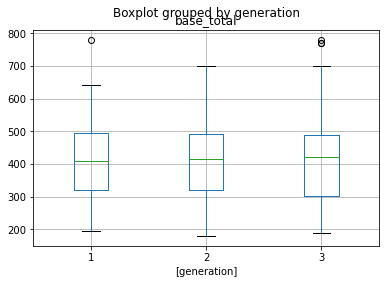

In [125]:
df4.boxplot(by='generation')

## Part (b)
### 2 points

As we did for t-tests, test for equal variance among the three samples. For ANOVA, this ultimately is of little consequence since the F-test is robust to violation of the homogeneity of variance, but it's worth checking nonetheless. 

In [127]:
test_stat, p_value = stats.levene(df4['base_total'][df4['generation'] == 1], df4['base_total'][df4['generation'] == 2])
alpha = 0.05

if p_value > alpha:
  print("Retain H0 - variance is roughly equal")
else:
  print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")

Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.7081507441841759
test stat: 0.14045232520958187


In [128]:
test_stat, p_value = stats.levene(df4['base_total'][df4['generation'] == 2], df4['base_total'][df4['generation'] == 3])
alpha = 0.05

if p_value > alpha:
  print("Retain H0 - variance is roughly equal")
else:
  print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")

Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.20263961694110175
test stat: 1.632424079229965


In [129]:
test_stat, p_value = stats.levene(df4['base_total'][df4['generation'] == 1], df4['base_total'][df4['generation'] == 3])
alpha = 0.05

if p_value > alpha:
  print("Retain H0 - variance is roughly equal")
else:
  print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")

Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.05671803081045466
test stat: 3.6606266604132225


## Part (c)
### 3 points

Perform the ANOVA test on the base totals of generations 1, 2, and 3. Given an alpha of 0.05, include your conclusion as an in-line comment in your code or as a separate text cell.

In [130]:
stats.f_oneway(gen1.base_total, gen2.base_total, gen3.base_total)

F_onewayResult(statistic=0.09048015905055794, pvalue=0.913511978321936)

We fail to reject the null hypothesis w/ a p value > 0.05 and a test statistic that is below 1. Meaning that the means are similiar